In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Latar Belakang

Bagaimana manajemen supermarket dapat menyesuaikan promosi dan produk yang dimiliki agar sesuai dengan target pasar pelanggan berdasarkan kategori seperti status pernikahan, pendidikan, penadapatan pelanggan, dan variabel lainnya. Harapannya tidakan ke depannya yang diambil dapat efektif dan efisien bagi usaha supermarket.

In [3]:
df = pd.read_csv(r'C:\Users\steve\Desktop\Fundamental\Supermarket Customers.csv')
display(df.head(), df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


Berdasarkan informasi yang diberikan dari 'Supermarket Customer', ada beberapa kolom dari data set 
People
● ID:Customer's unique identifier
● Year_Birth:Customer's birth year
● Education:Customer's education level
● Marital_Status:Customer's marital status
● Income:Customer's yearly household income
● Kidhome:Number of children in customer's household
● Teenhome:Number of teenagers in customer's household
● Dt_Customer:Date of customer's enrollment with the company
● Recency:Number of days since customer's last purchase
● Complain:1 if thecustomer complained in the last 2 years, 0 otherwise

Products
● MntWines:Amount spent on wine in last 2 years
● MntFruits:Amount spent on fruits in last 2 years
● MntMeatProducts:Amount spent on meat in last 2 years
● MntFishProducts:Amount spent on fish in last 2 years
● MntSweetProducts:Amount spent on sweets in last 2 years
● MntGoldProds:Amount spent on gold in last 2 years

Promotion
● NumDealsPurchases:Numberofpurchasesmadewithadiscount
● AcceptedCmp1:1 if the customer accepted the offer in the 1st campaign, 0 otherwise
● AcceptedCmp2:1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
● AcceptedCmp3:1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
● AcceptedCmp4:1 if the customer accepted the offer in the 4th campaign, 0 otherwise
● AcceptedCmp5:1 if the customer accepted the offer in the 5th campaign, 0 otherwise
● Response:1 if the customer accepted the offer in the last campaign, 0 otherwise

Place
● NumWebPurchases:Number of purchases made through the company’s website
● NumCatalogPurchases:Number of purchases made using a catalog
● NumStorePurchases:Number of purchases made directly in stores
● NumWebVisitsMonth:Number of visits to the company’s website in the last month

In [4]:
print(f' === Total baris dan kolom di dalam dataset df, yaitu {df.shape} ===')
df.info()


 === Total baris dan kolom di dalam dataset df, yaitu (2240, 29) ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds       

In [5]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


Sebelum melakukan pengolahan data akan dilakukan data cleaning dengan tujuan merapihkan missing value, memperbaiki typo atau kesalahan data pada isi kolom, dan kategori yang masih salah.

In [6]:
pd.set_option('display.max_colwidth', None)

list_item = []
for i in df.columns :
    list_item.append( [i, df[i].nunique(), df[i].unique()])

tabelDesc = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Data Unik', 'Sampel Unik'], data=list_item)
tabelDesc

# Melihat data unik pada setiap kolomnya

,Nama Kolom,Jumlah Data Unik,Sampel Unik
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 328,

Pada kolom 'Education' dan 'Marital_Status' terlihat pada isi sampel unik yang tidak sesuai sehingga perlu diperbaiki agar selaras dengan data yang lainnya.

In [7]:
np.round((df.isna().sum()/df.shape[0]*100), 2)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.07
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64

<Axes: >

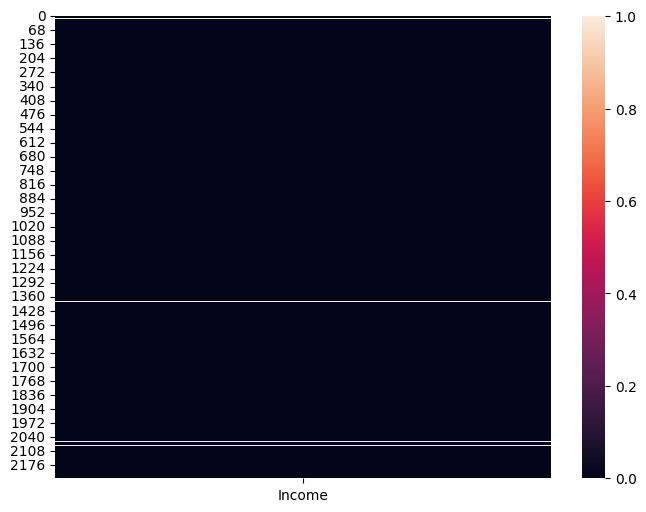

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Income']].isna())

Terlihat bahwa terdapat missing value pada data income sebesar 1.07%.


In [9]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [10]:
df.loc[df.Education =='2n Cycle','Education'] = 'Master'

In [11]:
df['Education'].value_counts()

Education
Graduation    1127
Master         573
PhD            486
Basic           54
Name: count, dtype: int64

In [12]:
df[df['Education']=='Basic'].head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
11,387,1976,Basic,Married,7500.0,0,0,13-11-2012,59,6,...,8,0,0,0,0,0,0,3,11,0
105,8373,1979,Basic,Together,24594.0,1,0,10-12-2013,94,1,...,5,0,0,0,0,0,0,3,11,0
136,5342,1976,Basic,Divorced,9548.0,1,0,08-08-2012,31,0,...,8,0,0,0,0,0,0,3,11,0
184,2563,1961,Basic,Married,28249.0,0,0,15-06-2014,80,1,...,6,0,0,0,0,0,0,3,11,0
190,9733,1978,Basic,Together,24882.0,1,0,09-09-2012,52,1,...,6,1,0,0,0,0,0,3,11,0
280,4669,1981,Basic,Married,24480.0,1,0,11-02-2013,46,4,...,7,0,0,0,0,0,0,3,11,0
344,8234,1973,Basic,Together,27190.0,1,0,15-08-2013,13,1,...,8,1,0,0,0,0,0,3,11,1
502,8151,1990,Basic,Married,24279.0,0,0,29-12-2012,6,16,...,8,0,0,0,0,0,0,3,11,0
608,2457,1975,Basic,Married,30801.0,0,1,26-10-2012,23,8,...,7,0,0,0,0,0,0,3,11,0
612,6682,1973,Basic,Married,18978.0,1,0,11-12-2012,41,2,...,8,0,0,0,0,0,0,3,11,0


In [13]:
df.loc[df.Education =='Basic','Education'] = 'Graduation'
df['Education'].value_counts()

Education
Graduation    1181
Master         573
PhD            486
Name: count, dtype: int64

In [14]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df.loc[df.Marital_Status =='Together','Marital_Status'] = 'Married'
df.loc[df.Marital_Status =='Alone','Marital_Status'] = 'Single'

In [16]:
df['Marital_Status'].value_counts()

Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
Absurd         2
YOLO           2
Name: count, dtype: int64

In [17]:
df[df['Marital_Status']=='Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,1,0,0,1,1,0,0,3,11,1
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,2,0,0,0,0,0,0,3,11,0


In [18]:
df[df['Marital_Status']=='YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,0
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,1


In [19]:
df.loc[df.Marital_Status =='Absurd','Marital_Status'] = 'Other'
df.loc[df.Marital_Status =='YOLO','Marital_Status'] = 'Other'
df['Marital_Status'].value_counts()

Marital_Status
Married     1444
Single       483
Divorced     232
Widow         77
Other          4
Name: count, dtype: int64

In [20]:
# jumlah missing value di kolom 'Income'
df[['Income']].isna().sum()

Income    24
dtype: int64

Jumlah baris yang kosong pada kolom 'Income' sebanyak 24.

In [21]:
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,Master,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Married,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [22]:
#proporsi data kosong pada kolom 'Income'
df[['Income']].isna().sum()/df.shape[0]*100

Income    1.071429
dtype: float64

In [23]:
# menghapus data kosong
df.dropna(subset=['Income'],inplace=True)

Karena dari hasil pemeriksaan, baris yang kosong tidak begitu berpengaruh terhadap data keseluruhan sehingga dapat dihapus dari tabel untuk baris yang kosong.

In [24]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Data Analysis

Setelah melakukan cleaning data, kita akan mencari bagaimana jumlah transaksi berdasarkan variabel status pernikahan, pendidikan, dan income atau pendapatan pelanggan.

In [25]:
df['NumStorePurchases'].value_counts()

NumStorePurchases
3     484
4     319
2     220
5     211
6     177
8     147
7     141
10    124
9     106
12    104
13     83
11     80
0      14
1       6
Name: count, dtype: int64

In [26]:
df_ct = pd.crosstab(df['Marital_Status'],df['NumStorePurchases'])
df_ct['Total'] = df_ct.sum(axis=1)
df_ct.sort_values('Total',ascending=False)

NumStorePurchases,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Total
Marital_Status,,,,,,,,,,,,,,,
Married,8,4,134,314,208,142,120,89,93,66,79,48,69,56,1430
Single,3,2,57,108,67,39,31,25,37,24,26,21,23,11,474
Divorced,3,0,24,48,33,25,16,16,12,15,10,9,10,11,232
Widow,0,0,5,14,11,5,7,10,5,1,9,2,2,5,76
Other,0,0,0,0,0,0,3,1,0,0,0,0,0,0,4


Dari hasil tabulasi antara status pernikahan dengan jumlah transaksi di toko.

Pelanggan yang sudah menikah paling banyak melakukan transaksi dengan total 1430 dan jumlah transaksi yang paling banyak, yaitu sebanyak '3 kali'.

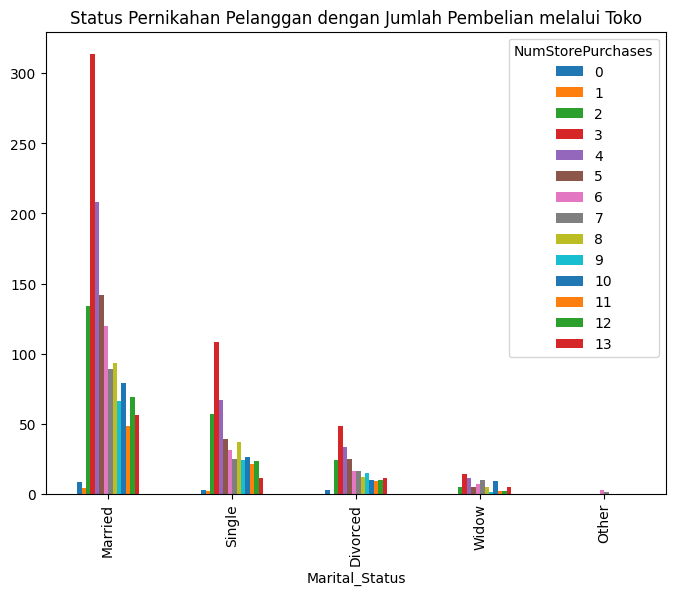

In [27]:
df_ct.sort_values('Total',ascending=False).head(10).drop(columns='Total').plot(kind='bar',figsize=(8,6), 
title='Status Pernikahan Pelanggan dengan Jumlah Pembelian melalui Toko')
plt.show()

Visualisasi untuk model QQ Plot, Histogram, dan Scatter Plot.

QQ Plot menampilkan plot variabel bersarkan nilai kuantil dari data jumlah pembelian/transaksi di toko.

Histogram menampilkan distribusi data ari data jumlah pembelian/transaksi di toko.

Scatter Plot menampilkan sebaran data dari dua variabel yang berbeda, yaitu pembelian langsung di toko dengan pendapatan (income).

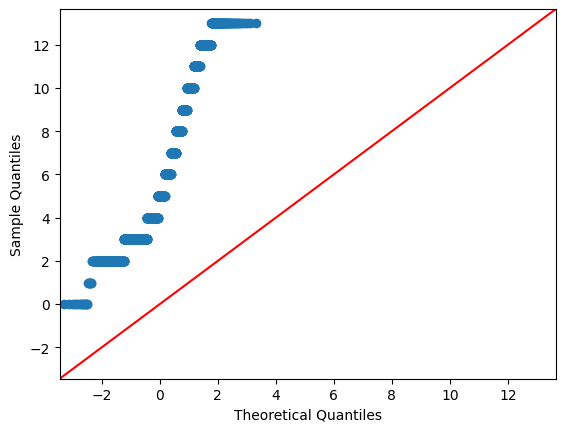

In [28]:
import statsmodels.api as sm
import pylab

sm.qqplot(df['NumStorePurchases'], line = '45')
pylab.show()

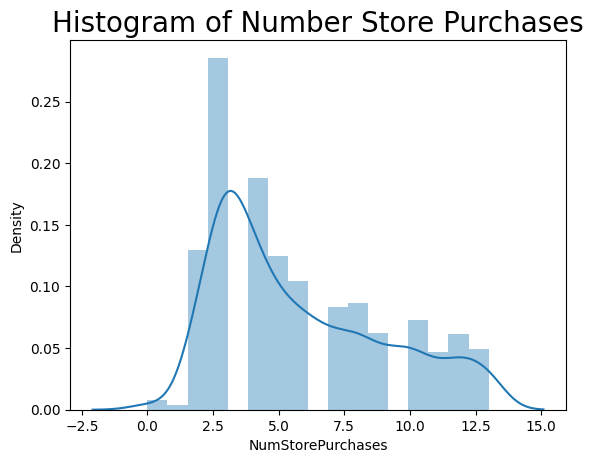

In [29]:
sns.distplot(df['NumStorePurchases'])
plt.title('Histogram of Number Store Purchases', size = 20)
plt.show()

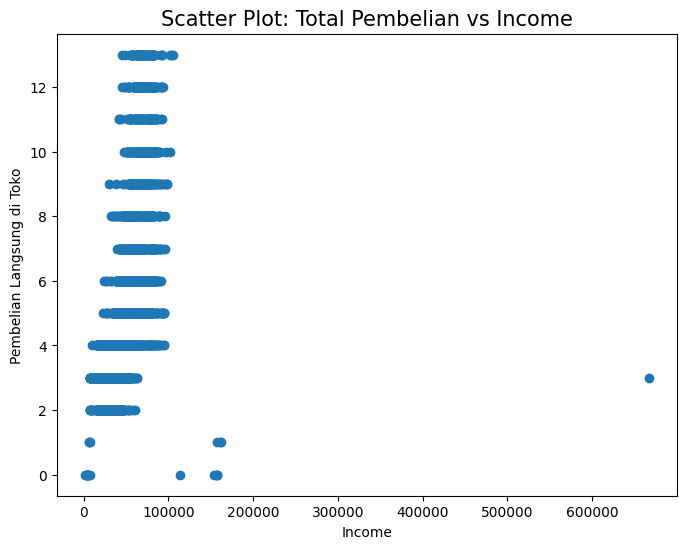

In [30]:
plt.figure(figsize = (8,6))
plt.scatter(df['Income'], df['NumStorePurchases'])
plt.title('Scatter Plot: Total Pembelian vs Income', size = 15)
plt.xlabel('Income')
plt.ylabel('Pembelian Langsung di Toko')
plt.show()

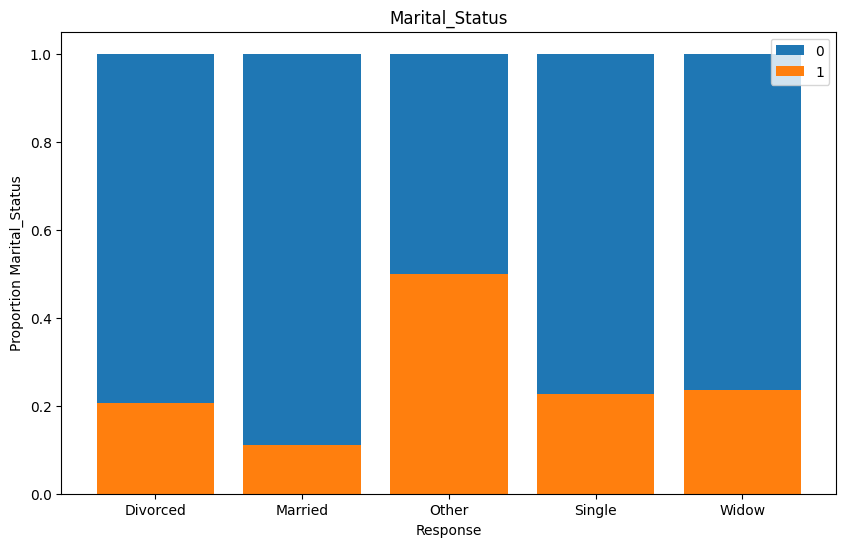

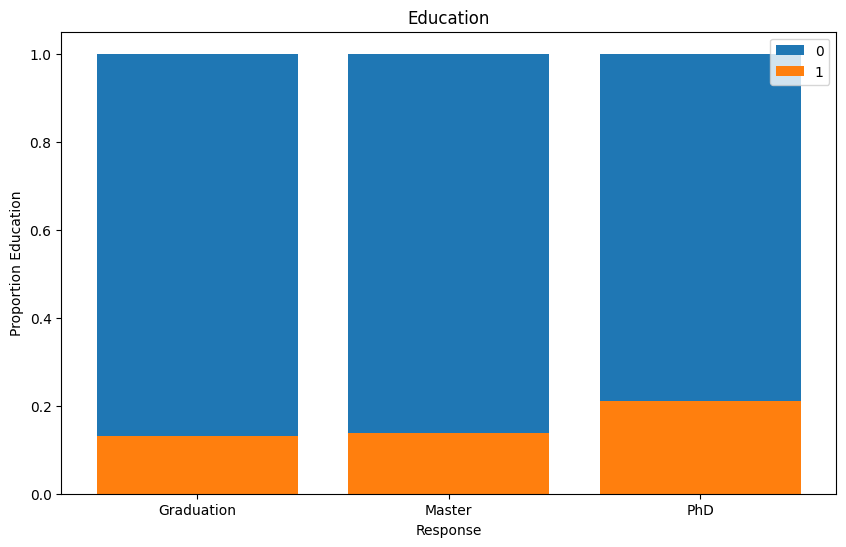

In [31]:
for i in ['Marital_Status', 'Education']:
    ct=pd.crosstab(df[i],df['Response'],normalize='index').sort_index()
    ct['total']=ct.sum(axis=1)
    plt.figure(figsize=(10,6))
    plt.bar(np.arange(df[i].nunique()),ct['total'])
    plt.bar(np.arange(df[i].nunique()),ct[1])
    plt.xlabel('Response')
    plt.ylabel(f'Proportion {i}')
    plt.legend([0,1])
    plt.xticks(np.arange(len(ct.index.tolist())),ct.index.tolist())
    plt.title(i)
    plt.show()

Hasil dari tabel Bar Char / Diagram Batang
'Response' penerimaan kampanye terakhir berdasarkan status pernikahan dan pendidikan pelanggan
Status pernikahan: 'Other' memiliki proporsi paling tinggi daripada yang lain dalam menerima promosi (warna oranye).
Pendidikan: 'PhD' memiliki proporsi tertinggi diantara yang lain (warna oranye).

In [32]:
from scipy.stats import ttest_1samp

In [33]:
# T-test Paired

# Hypothesis
# H0 : Tidak adanya hubungan kedatangan pelanggan ke toko dengan penerimaan tawaran di kampanye terakhir = 0
# H1 : H0 = Adanya hubungan kedatangan pelanggan ke toko dengan penerimaan tawaran di kampanye terakhir > 0 

ttest, pval = ttest_1samp(df['Response'], 0)
print('P-Value:', pval/2)
print('T-Statistic:', ttest)

if pval/2 < 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

P-Value: 1.03958688617431e-80
T-Statistic: 19.791732933524266
Tolak H0


Hasil dari pengujian T-test Paired
Tolak H0 dikarenakan adanya relasi atau hubungan kedatangan pelanggan ke toko dengan penerimaan penawaran berdasarkan kampanye/promosi terakhir.

Kesimpulan

1. Total data pada tabel supermarket customer sebanyak 2240 data, terdapat 2216 jumlah transaksi pembelian di toko.
2. Berdasarkan status pernikahan, golongan yang paling banyak melakukan transaksi, yaitu yanhg berstatus 'Married'.
3. Pelanggan yang paling banyak melakukan transaksi di toko mayoritas dari lulusan Graduation (Strata 1).
4. Jumlah pendapatan pelanggan berbanding lurus dengan jumlah transaksi di toko.
5. Jumlah transaksi yang paling mayoritas berdasarkan status pernikahan, yaitu sebanyak '3 kali'.
6. Pelanggan yang menerima penawaran dari kampanye/promosi terakhir banyak dari status pernikahan 'Other' dan pendidikan 'PhD'.
7. Hasil pengujian T-test paired test adanya hubungan antara kedatangan pelanggan ke toko dengan penerimaan tawaran di kampanye terakhir.

Rekomendasi

1. Kampanye/promosi bisa lebih kembali ditingkatkan untuk lebih memfokuskan bagi pelanggan yang sudah menikah karena bagi yang sudah berkeluarga cenderung memiliki penghasilan lebih besar sehingga meningkatkan kedatangan ke supermarket.
2. Lebih meratakan kampanye ke semua jenis pendidikan pelangan.
3. Meningkatkan promosi kepada pelangga 'generasi milenal' berdasarkan tahun kelahiran 1981-1996 karena pada generasi tersebut banyak melakukan pembelian di toko.
4. Menambahkan varian produk agar meningkatkan jumlah pilihan ketika pelanggan datang belanja di supermarket.